In [1]:
import os
from os.path import join

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
case_data_path = join('data', 'Case.csv')

In [5]:
case_data_path

'data/Case.csv'

In [12]:
case = pd.read_csv('data/Case.csv', sep='\t') # sep='\t'를 넣는 이유? 공백 또는 \ t 탭을 인쇄 구분 기호로 사용하면 차이점이 표시됩니다.
df = pd.read_csv('data/PatientInfo.csv', sep='\t')
policy = pd.read_csv('data/Policy.csv', sep='\t')
region = pd.read_csv('data/Region.csv', sep='\t')
searchtrend = pd.read_csv('data/SearchTrend.csv', sep='\t')
seoulfloating = pd.read_csv('data/SeoulFloating.csv', sep='\t')
time = pd.read_csv('data/Time.csv', sep='\t')

# 이렇게 해야 컬럼에서 에러가 안남
df= pd.read_csv('data/PatientInfo.csv', delimiter=',' ,sep=r', ') 

In [13]:
print(time)

    date,time,test,negative,confirmed,released,deceased
0                              2020-01-20,16,1,0,1,0,0 
1                              2020-01-21,16,1,0,1,0,0 
2                              2020-01-22,16,4,3,1,0,0 
3                            2020-01-23,16,22,21,1,0,0 
4                            2020-01-24,16,27,25,2,0,0 
..                                                 ... 
158       2020-06-26,0,1232315,1200885,12602,11172,282 
159       2020-06-27,0,1243780,1211261,12653,11317,282 
160       2020-06-28,0,1251695,1219975,12715,11364,282 
161       2020-06-29,0,1259954,1228698,12757,11429,282 
162       2020-06-30,0,1273766,1240157,12800,11537,282 

[163 rows x 1 columns]


In [14]:
print(time.head())

  date,time,test,negative,confirmed,released,deceased
0                            2020-01-20,16,1,0,1,0,0 
1                            2020-01-21,16,1,0,1,0,0 
2                            2020-01-22,16,4,3,1,0,0 
3                          2020-01-23,16,22,21,1,0,0 
4                          2020-01-24,16,27,25,2,0,0 


In [15]:
print(df.columns)

Index(['patient_id', 'sex', 'age', 'country', 'province', 'city',
       'infection_case', 'infected_by', 'contact_number', 'symptom_onset_date',
       'confirmed_date', 'released_date', 'deceased_date', 'state'],
      dtype='object')


In [16]:
df.head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [17]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5165 entries, 0 to 5164
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   patient_id          5165 non-null   int64 
 1   sex                 4043 non-null   object
 2   age                 3785 non-null   object
 3   country             5165 non-null   object
 4   province            5165 non-null   object
 5   city                5071 non-null   object
 6   infection_case      4246 non-null   object
 7   infected_by         1346 non-null   object
 8   contact_number      791 non-null    object
 9   symptom_onset_date  690 non-null    object
 10  confirmed_date      5162 non-null   object
 11  released_date       1587 non-null   object
 12  deceased_date       66 non-null     object
 13  state               5165 non-null   object
dtypes: int64(1), object(13)
memory usage: 565.0+ KB
None


In [30]:
df2=df[['age','province','city']]
# df3=df2[df2['age'] == '20s']
# df3=df2[df2['province'] == 'Seoul']

df3=df2[((df2['age'] =='20s')| (df2['age'] =='30s'))& (df['province']=='Seoul')]
df4=df3[['age','city']]

In [31]:
print(df4)

     age          city
1    30s   Jungnang-gu
3    20s       Mapo-gu
4    20s   Seongbuk-gu
6    20s     Jongno-gu
7    20s           etc
..   ...           ...
699  30s  Yangcheon-gu
737  20s  Yangcheon-gu
738  20s  Yangcheon-gu
753  30s  Yangcheon-gu
880  30s    Gangseo-gu

[265 rows x 2 columns]


In [32]:
df5=df4['city'].value_counts()

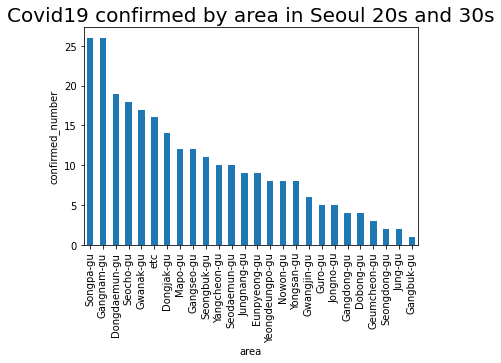

In [35]:
df5.plot(kind='bar')

# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.title('Covid19 confirmed by area in Seoul 20s and 30s',fontsize=20) ## 타이틀 출력
plt.xlabel('area') ## x축 라벨 출력
plt.ylabel('confirmed_number') 

plt.show()